In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
%matplotlib inline

In [2]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")
train.drop(columns=['Name','Ticket','Embarked'], inplace=True)
test.drop(columns=['Name','Ticket','Embarked'], inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,male,22.0,1,0,7.2500,NaN
1,2,1,1,female,38.0,1,0,71.2833,C85
2,3,1,3,female,26.0,0,0,7.9250,NaN
3,4,1,1,female,35.0,1,0,53.1000,C123
4,5,0,3,male,35.0,0,0,8.0500,NaN


In [3]:
train['Sex'] = train['Sex'].astype('category')
train['Sex'] = train['Sex'].cat.codes
train['Level'] = train['Cabin'].astype(str).str[0]
train['Level'][train['Level']=='n'] = np.nan
train.drop(['Cabin'], axis=1, inplace=True)
train['Level'] = pd.factorize(train['Level'])[0]

test['Sex'] = test['Sex'].astype('category')
test['Sex'] = test['Sex'].cat.codes
test['Level'] = test['Cabin'].astype(str).str[0]
test['Level'][test['Level']=='n'] = np.nan
test.drop(['Cabin'], axis=1, inplace=True)
test['Level'] = pd.factorize(test['Level'])[0]
# train['Age'] = train['Age'].astype('float')
train.head()

C:\Users\Roela\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Roela\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Level
0,1,0,3,1,22.0,1,0,7.2500,-1
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,-1
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,-1


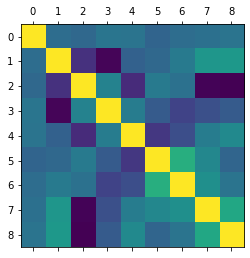

In [4]:
plt.matshow(train.corr())

In [32]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(train)
train_imputed = imp_mean.transform(train)
# test_imputed = imp_mean.transform(test)


In [25]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Level
0,1,0,3,1,22.0,1,0,7.2500,-1
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,-1
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,-1


In [37]:
# features = train.columns
# features = ('PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Level')
features = ('PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare')
clf.fit(train['Survived', 'Pclass'], train['Survived'])

KeyError: ('Survived', 'Pclass')